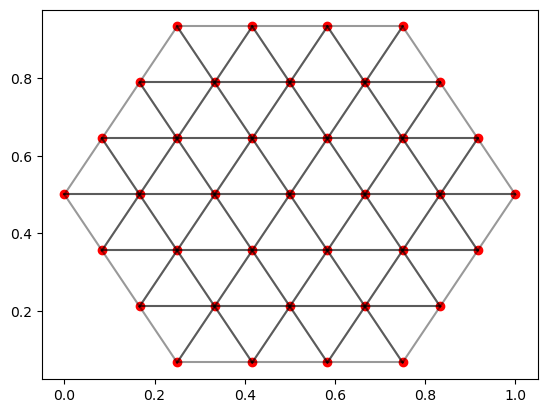

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct


V = np.genfromtxt("Meshdata/VerticesRing3.txt")
T = np.genfromtxt("Meshdata/FacesRing3.txt")

n_v = int(V.size/2)
n_t = int(T.size/3)

for i in range(0, n_t , 1):
        for j in range( 0, 3 , 1):
                k = int(T[i][j])
                l = int(T[i][(j+1)%3])
                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black', alpha=0.4)
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='r', marker='o')
plt.show()



Sol = np.genfromtxt("Solutions/PoissonSolution.txt")
#Err = np.genfromtxt("Solutions/ErrorFor2.000000")
#V1 = V

#Sol2 = np.genfromtxt("Solutions/SolFor3.000000")
#Err2 = np.genfromtxt("Solutions/ErrorFor3.000000")
#V2 = V

#Sol3 = np.genfromtxt("Solutions/SolFor4.000000")
#Err3 = np.genfromtxt("Solutions/ErrorFor4.000000")
#V3 = V

In [4]:
def InterpolationPlot( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet,alpha=0.5)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10)
    for i in range(0, len(Triangulation) , 1):
        for j in range( 0, 3 , 1):
                k = int(Triangulation[i][j])
                l = int(Triangulation[i][(j+1)%3])
                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)

def DeleteFromMultArrays( mArr , arr, errors , tolerance):
    i = 0
    while i < len(arr):
        if (abs(errors[i])>tolerance):
            mArr = np.delete(mArr,i,0)
            arr = np.delete(arr,i)
            errors = np.delete(errors,i)
        else:
            i += 1
    NewData = (mArr, arr, errors)
    return NewData


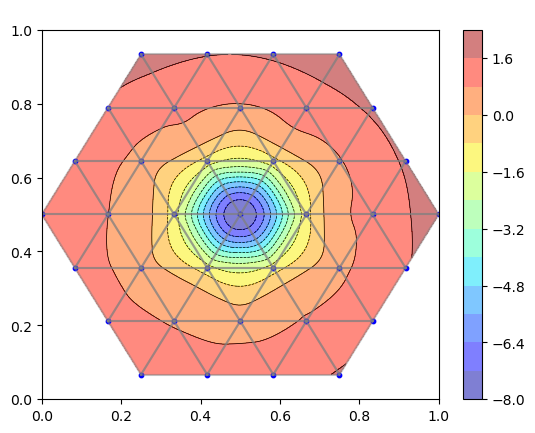

In [5]:
InterpolationPlot( V , Sol , " ", T)

NameError: name 'V1' is not defined

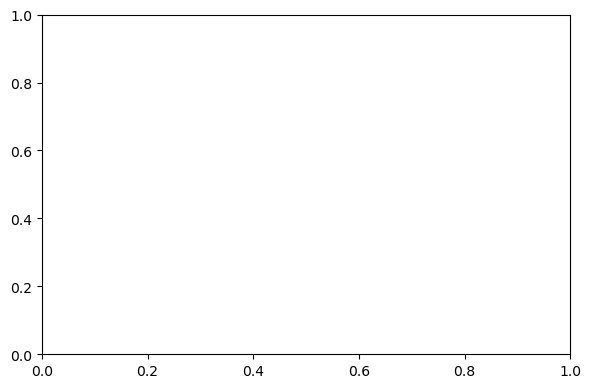

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(321)
InterpolationPlot( V1, Sol, " ", T)

plt.subplot(323)
InterpolationPlot( V2, Sol2, " ", T)

plt.subplot(325)
InterpolationPlot( V3, Sol3, " ", T)


plt.subplot(322)
InterpolationPlot( V1[:len(V1):], Err[:len(V1):], " ", T)

plt.subplot(324)
InterpolationPlot( V2[:len(V1):], Err2[:len(V1):], " ", T)

plt.subplot(326)
InterpolationPlot( V3[:len(V1):], Err3[:len(V1):], " ", T)

plt.show()

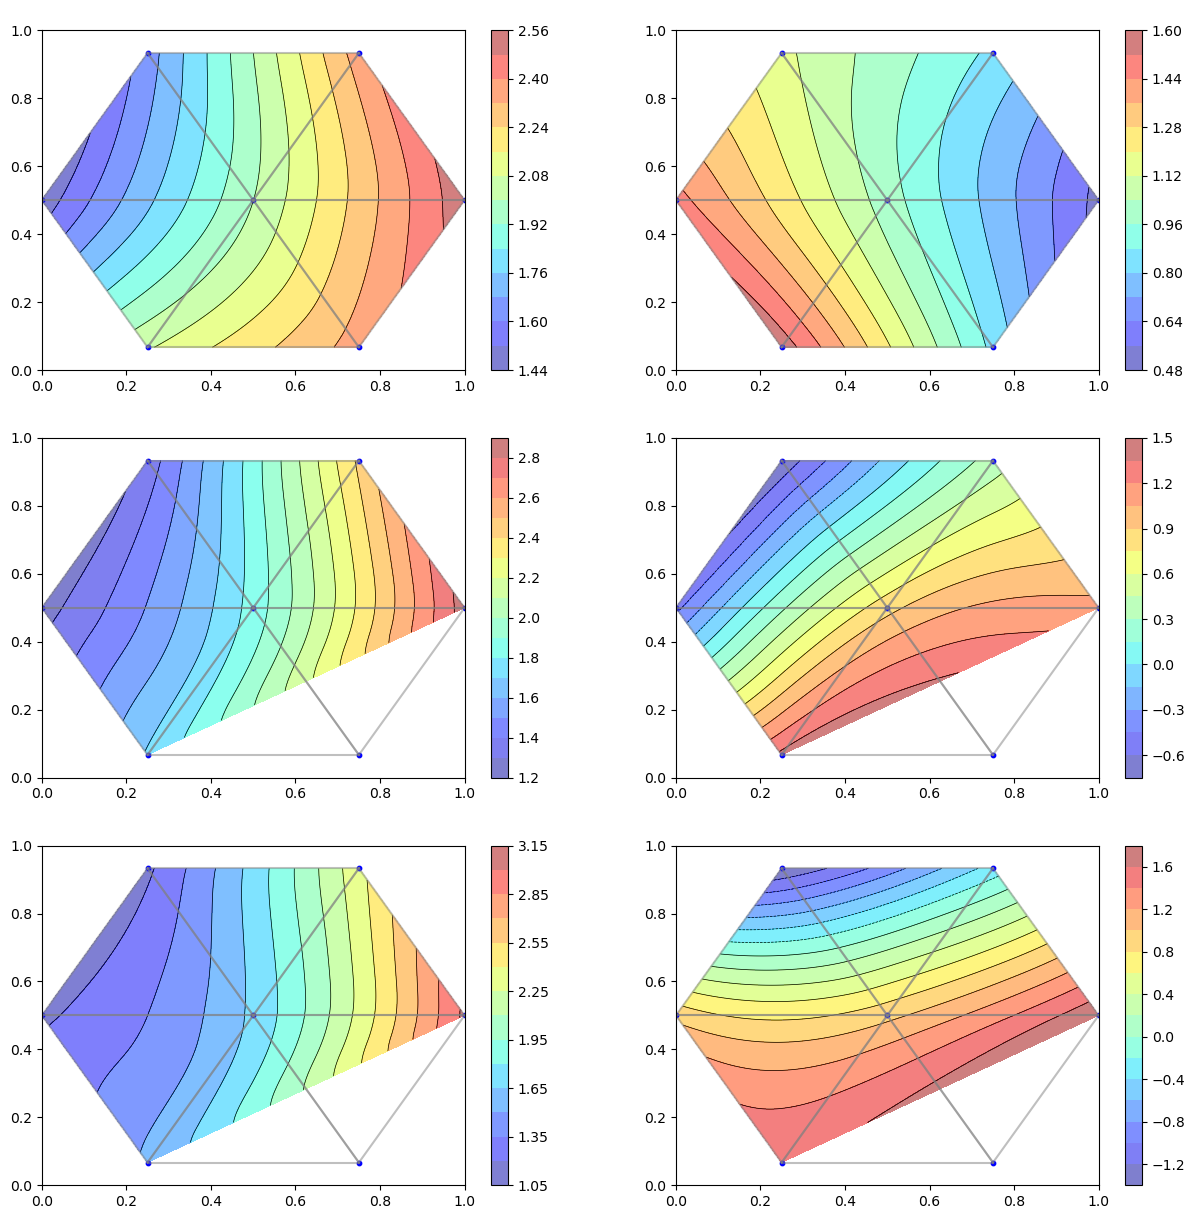

In [ ]:
Data1 = DeleteFromMultArrays( V1 , Sol , Err , 2)
Data2 = DeleteFromMultArrays( V2 , Sol2 , Err2 , 2)
Data3 = DeleteFromMultArrays( V3 , Sol3 , Err3 , 2)

plt.figure(figsize=(15,15))

plt.subplot(321)
InterpolationPlot( Data1[0], Data1[1], " ", T)

plt.subplot(323)
InterpolationPlot( Data2[0], Data2[1], " ", T)

plt.subplot(325)
InterpolationPlot( Data3[0], Data3[1], " ", T)

plt.subplot(322)
InterpolationPlot( Data1[0], Data1[2], " ", T)

plt.subplot(324)
InterpolationPlot( Data2[0], Data2[2], " ", T)

plt.subplot(326)
InterpolationPlot( Data3[0], Data3[2], " ", T)

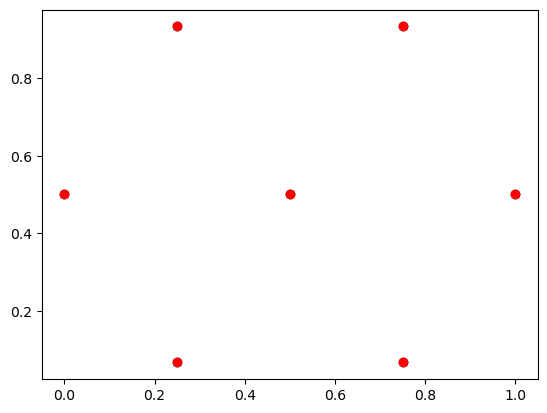

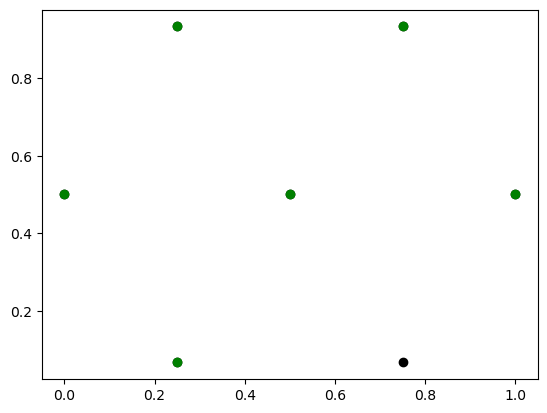

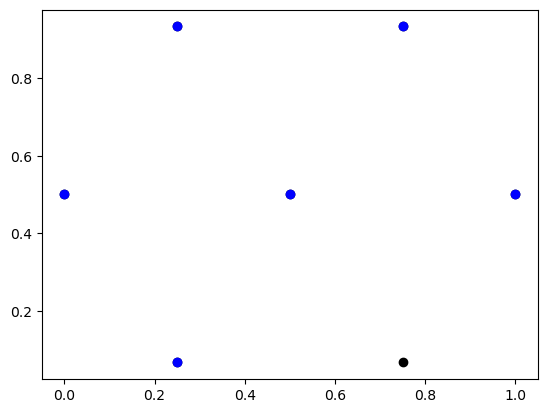

In [ ]:
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='black', marker='o')
for i in range(0,len(Data1[0]),1):
    plt.scatter(Data1[0][i][0],Data1[0][i][1], color='r', marker='o')
plt.show()
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='black', marker='o')
for i in range(0,len(Data2[0]),1):
    plt.scatter(Data2[0][i][0],Data2[0][i][1], color='g', marker='o')
plt.show()
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='black', marker='o')
for i in range(0,len(Data3[0]),1):
    plt.scatter(Data3[0][i][0],Data3[0][i][1], color='b', marker='o')
plt.show()

In [ ]:
def AnaDivAtVertex( a ):
    db1 = -1./3.**0.5
    dm1 = 2./3.**0.5
    db2 = 2.*3.**0.5
    dm2 = -2.*3.**0.5
    I1 = dm1*( ((a)/(a+1.))*((7./8.)**(a+1.)-(3./4.)**(a+1.)) + 13./128. )  +  db1*( (7./8.)**(a)-(3./4.)**(a) +1./8. )
    I2 = dm2*( (a)/(a+1.)*((1.)**(a+1.)-(7./8.)**(a+1.)) + 15./128. )  +  db2*( (1.)**a-(7./8.)**a +1./8. )
    val = I1 + I2
    return val

In [ ]:
Param = [2.,3.,4.]
for i in range(0,len(Param)):
    print( AnaDivAtVertex( Param[i] ) )

0.1954571223819046
0.2308837258136249
0.25464868074169356


In [ ]:
print(Sol[5])
print(Sol2[5])
print(Sol3[5])

2.53275
2.85038
3.03264


In [ ]:
A = 3**0.5/4 * (1/4)**0.5

In [ ]:
Sol*A

array([0.43286764, 0.44806422, 0.31810196, 0.35545363, 0.51109572,
       0.54835646, 0.51054363])